In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/dstoc/Documents/Python Scripts/Fixed Income Dashboards/reduced_data_cleaned.csv')

In [2]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt


df2 = df.copy()

# Assuming 'Date' is the name of the column containing date information
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Define the features (independent variables) and target (dependent variable)
features = list(df2)

# Define the lag order (number of lags to create)
lag_order = 6  # Example: Creating lagged values for the past n periods

for feature in features:
    for lag in range(1, lag_order+1):
        df2[f'{feature}_lag{lag}'] = df2[feature].shift(lag)



C:\Users\dstoc\AppData\Local\Temp\ipykernel_8152\3755973973.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{feature}_lag{lag}'] = df2[feature].shift(lag)
C:\Users\dstoc\AppData\Local\Temp\ipykernel_8152\3755973973.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{feature}_lag{lag}'] = df2[feature].shift(lag)
C:\Users\dstoc\AppData\Local\Temp\ipykernel_8152\3755973973.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [3]:

# replace inf and -inf with na and  drops rows with missing values in the lagged variables
df2 = df2[6:]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(axis = 1)


In [6]:

# Define the number of periods to lead the target variable (1 period in this case)
lead_periods = 1

# redefine the features (independent variables) and target (dependent variable)
features = list(df2)

# Create a new variable representing the 'lead' of the target
df2['YIELD_weekly_percent_change_10 YR_lead'] = df2['YIELD_weekly_percent_change_10 YR'].shift(-lead_periods)

# Drop rows with missing values in the features or target (created by the shift)
df2 = df2.dropna(subset=features + ['YIELD_weekly_percent_change_10 YR_lead'])

In [8]:
df2['YIELD_weekly_percent_change_10 YR'].tail()

Date
2023-10-15   -0.031381
2023-10-22    0.064795
2023-10-29   -0.018256
2023-11-05   -0.055785
2023-11-12    0.008753
Name: YIELD_weekly_percent_change_10 YR, dtype: float64

In [9]:
df3 = df2.copy()
features = list(df3.select_dtypes(include=['float64', 'int64']).columns)[0:(len(df3.columns)-1)]
X = df3[features]
y = df3['YIELD_weekly_percent_change_10 YR_lead']


In [12]:
df3 = df2.copy()
features = list(df3.columns)[0:(len(df3.columns)-1)]
X = df3[features]
y = df3['YIELD_weekly_percent_change_10 YR_lead']

column_name = 'YIELD_weekly_percent_change_10 YR_lead'

if column_name.lower() in map(str.lower, X.columns):
    print(f"The DataFrame contains the column '{column_name}'.")
else:
    print(f"The DataFrame does not contain the target variable: '{column_name}'.")

The DataFrame does not contain the target variable: 'YIELD_weekly_percent_change_10 YR_lead'.


In [13]:
import pandas as pd

def select_top_variables(df, target_variable, num_variables):
    # Calculate the rank correlation (Spearman's rho) with the target variable
    correlation_matrix = df.corr(method='spearman')
    
    # Print the entire correlation matrix for debugging
    print(correlation_matrix)
    
    # Extract the correlation values for the target variable
    target_correlations = correlation_matrix[target_variable]
    
    # Sort variables based on absolute correlation values
    sorted_variables = target_correlations.abs().sort_values(ascending=False)
    
    # Select the top variables
    selected_variables = sorted_variables.index[:num_variables]
    
    # Extract the correlation values for the selected variables
    selected_correlations = target_correlations[selected_variables]

    corr_data = pd.DataFrame()
    corr_data['Variable'] = selected_variables
    corr_data['Correlation'] = selected_correlations

    return corr_data

# Assuming df3 is your DataFrame and 'YIELD_weekly_percent_change_10 YR' is the target variable
correlated_variables = select_top_variables(df3, 'YIELD_weekly_percent_change_10 YR_lead', 200)



                                                    YIELD_weekly_percent_change_6 MO  \
YIELD_weekly_percent_change_6 MO                                            1.000000   
YIELD_weekly_percent_change_1 YR                                            0.568017   
YIELD_weekly_percent_change_2 YR                                            0.348194   
YIELD_weekly_percent_change_3 YR                                            0.337034   
YIELD_weekly_percent_change_5 YR                                            0.328363   
...                                                                              ...   
AUD_FO_weekly_percent_change_Nonreportable Posi...                          0.051475   
AUD_FO_weekly_percent_change_Nonreportable Posi...                          0.010565   
AUD_FO_weekly_percent_change_Nonreportable Posi...                          0.000084   
AUD_FO_weekly_percent_change_Nonreportable Posi...                          0.037224   
YIELD_weekly_percent_change_10 Y

In [14]:
import pandas as pd

def select_top_variables(df, target_variable, num_variables):
    # Calculate the rank correlation (Spearman's rho) with the target variable
    correlation_matrix = df.corrwith(df[target_variable], method='spearman')
    
    # Sort variables based on absolute correlation values
    sorted_variables = correlation_matrix.abs().sort_values(ascending=False)
    
    # Select the top variables
    selected_variables = sorted_variables.index[:num_variables]
    
    # Extract the correlation values for the selected variables
    selected_correlations = correlation_matrix[selected_variables]
    
    # Create a DataFrame to store the results
    corr_data = pd.DataFrame({
        'Variable': selected_variables,
        'Correlation': selected_correlations
    })
    
    return corr_data

# Assuming df3 is your DataFrame and 'YIELD_weekly_percent_change_10 YR' is the target variable
correlated_variables = select_top_variables(df3, 'YIELD_weekly_percent_change_10 YR_lead', 200)


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Assuming X is your DataFrame containing the selected variables
vif_results = calculate_vif(df3[correlated_variables['Variable']])

# Print the variables with high VIF
low_vif_variables = vif_results[vif_results["VIF"] < 5][:21]
print("Variables with low VIF:")
print(low_vif_variables)


Variables with low VIF:
                                             Variable       VIF
0              YIELD_weekly_percent_change_10 YR_lead  1.961579
3      UST_BOND_FU_weekly_percent_change_Dealer Longs  1.289340
14  WTI_PHYS_FU_weekly_percent_change_Commercial S...  3.813266
22  NATGAS_FO_weekly_percent_change_Commercial Lon...  3.731143
24              YIELD_weekly_percent_change_1 YR_lag3  1.679582
25  UST_BOND_FO_weekly_percent_change_Dealer Sprea...  1.596992
35              YIELD_weekly_percent_change_6 MO_lag3  1.928150
36  UST_BOND_FU_weekly_percent_change_Dealer Longs...  1.215217
42  WTI_PHYS_FU_weekly_percent_change_Noncommercia...  1.821023
47  UST_10Y_FU_weekly_percent_change_Dealer Spread...  1.462608
49  SP500_eMini_FO_weekly_percent_change_Dealer Sp...  3.989637
59              YIELD_weekly_percent_change_6 MO_lag4  1.906442
60    UST_10Y_FO_weekly_percent_change_Dealer Spreads  3.966735
63  WTI_PHYS_FU_weekly_percent_change_Commercial L...  3.405655
64  UST_10Y_FU_w

In [16]:
features2 = [feature for feature in features if feature != "YIELD_weekly_percent_change_10 YR_lead"]

In [ ]:
#### OLD CODE PRIOR TO UTILIZING GRIDSEARCH ####

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from math import sqrt
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import TimeSeriesSplit
# import numpy as np

# # Define the features (independent variables) and target (dependent variable)
# df4 = df3.copy()
# features = low_vif_variables["Variable"]
# features2 = [feature for feature in features if feature != "YIELD_weekly_percent_change_10 YR_lead"]
# X = df4[features2]
# y = df4['YIELD_weekly_percent_change_10 YR_lead']

# # Scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Initialize the Gradient Boosting Regressor
# gbm = GradientBoostingRegressor(n_estimators=50, random_state=248, learning_rate=0.3, subsample=0.75, 
#                                 max_depth=3, min_samples_leaf=2)

# # Define the initial training size (e.g., 70% of the data)
# initial_train_size = int(0.7 * len(df4))

# # Create lists to store the predictions for each fold
# y_pred_train = []
# y_pred_test = []

# # Create a function for expanding rolling window one-step-ahead cross-validation
# def expanding_rolling_cv(X, y, model, initial_train_size):
#     rmse_scores = []

#     for i in range(initial_train_size, len(X)):
#         X_train = X.iloc[:i]
#         y_train = y.iloc[:i]

#         # Train the model on the training data
#         model.fit(X_train, y_train)

#         # Append the prediction to the appropriate list
#         if i == initial_train_size:
#              # Record predictions from the training period
#             y_pred = model.predict(X.iloc[:i])
#             y_pred_train.extend(y_pred[:])
#         else:
#              # Make one-step-ahead prediction for the next period
#             y_pred = model.predict(X.iloc[i:i+1])
#             y_pred_test.append(y_pred[0])

#             # Extract the actual target value for the next period
#             y_actual = y.iloc[i]

#             # Calculate RMSE for this fold
#             rmse = sqrt(mean_squared_error([y_actual], [y_pred]))
#             rmse_scores.append(rmse)

#     return rmse_scores

# # Perform expanding rolling window cross-validation and get RMSE scores
# rmse_scores = expanding_rolling_cv(X, y, gbm, initial_train_size)

# # Print the RMSE scores for each fold
# for i, rmse in enumerate(rmse_scores, start=1):
#     print(f'Fold {i} RMSE: {rmse:.4f}')

# # Calculate the mean RMSE across all folds
# mean_rmse = np.mean(rmse_scores)
# print(f'Mean RMSE: {mean_rmse:.4f}')

# # Use the predictions made during cross-validation as predictions of y
# y_pred_cv = y_pred_train + y_pred_test

# # Split the predictions into training and testing periods (for plotting)
# y_train_pred = y_pred_cv[:initial_train_size]
# y_test_pred = y_pred_cv[initial_train_size:]


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score
# # Split the actual 'GDP_lead' values into training and testing periods
# y_train_actual = y.iloc[:initial_train_size]
# y_test_actual = y.iloc[initial_train_size+1:]

# # Create a time index for plotting
# time_index_train = range(len(y_train_actual))
# time_index_test = range(len(y_train_actual), len(y_train_actual) + len(y_test_actual))

# # Calculate evaluation metrics for the training and testing periods
# mae_train = mean_absolute_error(y_train_actual, y_train_pred)
# rmse_train = sqrt(mean_squared_error(y_train_actual, y_train_pred))
# r2_train = r2_score(y_train_actual, y_train_pred)
# print(f'IS Mean Absolute Error (MAE): {mae_train:.4f}')
# print(f'IS Root Mean Squared Error (RMSE): {rmse_train:.4f}')
# print(f'IS R-squared (R2): {r2_train:.4f}')

# mae_test = mean_absolute_error(y_test_actual, y_test_pred)
# rmse_test = sqrt(mean_squared_error(y_test_actual, y_test_pred))
# r2_test = r2_score(y_test_actual, y_test_pred)
# print(f'OOS Mean Absolute Error (MAE): {mae_test:.4f}')
# print(f'OOS Root Mean Squared Error (RMSE): {rmse_test:.4f}')
# print(f'OOS R-squared (R2): {r2_test:.4f}')

In [ ]:
# # Plot the actual vs. predicted values for the training and testing periods
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(time_index_train, y_train_actual, label='Actual (Training)', color='blue')
# plt.plot(time_index_train, y_train_pred, label='Predicted (Training)', linestyle='--', color='red')
# plt.title('Actual vs. Predicted TARGET_lead (Training Period)')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(time_index_test, y_test_actual, label='Actual (Testing)', color='blue')
# plt.plot(time_index_test, y_test_pred, label='Predicted (Testing)', linestyle='--', color='red')
# plt.title('Actual vs. Predicted TARGET_lead (Testing Period)')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# df5 = df3.copy()
# features = low_vif_variables["Variable"]
# features2 = [feature for feature in features if feature != "YIELD_weekly_percent_change_10 YR_lead"]
# df5['YIELD_weekly_percent_change_10 YR_lead'] = np.where(df5['YIELD_weekly_percent_change_10 YR_lead'] < 0, 'LONG', 'SHORT')
# X = df5[features2]
# y = df5['YIELD_weekly_percent_change_10 YR_lead']
# # Initialize the Gradient Boosting Classifier
# gbm = GradientBoostingClassifier(n_estimators=100, random_state=248, learning_rate=0.01, subsample=0.75, max_depth=8, min_samples_leaf=5)

# # Define the initial training size (e.g., 70% of the data)
# initial_train_size = int(0.7 * len(df4))



# # Create a function for expanding rolling window one-step-ahead cross-validation
# def expanding_rolling_cv(X, y, model, initial_train_size):
#     # Create lists to store the predictions for each fold
#     y_pred_train = []
#     y_pred_test = []

#     for i in range(initial_train_size, len(X)):
#         X_train = X.iloc[:i]
#         y_train = y.iloc[:i]

#         # Train the model on the training data
#         model.fit(X_train, y_train)

#         # Append the prediction to the appropriate list
#         if i == initial_train_size:
#             # Record predictions from training period
#             y_pred = model.predict(X.iloc[:i])
#             y_pred_train.extend(y_pred)
            
#         else:
#             # Make one-step-ahead prediction for the next period
#             y_pred = model.predict(X.iloc[i:i+1])
#             y_pred_test.append(y_pred[0])

#     return y_pred_train, y_pred_test

# # Perform expanding rolling window cross-validation and get in-sample and out-of-sample predictions
# y_pred_train, y_pred_test = expanding_rolling_cv(X, y, gbm, initial_train_size)


In [ ]:

# conf_matrix_in_sample = confusion_matrix(y[:initial_train_size], y_pred_train, labels=['LONG', 'SHORT'])
# conf_matrix_out_of_sample = confusion_matrix(y[(initial_train_size+1):], y_pred_test, labels=['LONG', 'SHORT'])

# print(f'\nConfusion Matrix for the In-Sample Period: \n{conf_matrix_in_sample}')
# print(f'Confusion Matrix for the Out-of-Sample Period: \n{conf_matrix_out_of_sample}')

# accuracy_in_sample = accuracy_score(y[:initial_train_size], y_pred_train)
# accuracy_out_of_sample = accuracy_score(y[(initial_train_size+1):], y_pred_test)

# print(f'\nAccuracy for the In-Sample Period: {accuracy_in_sample:.4f}')
# print(f'Accuracy for the Out-of-Sample Period: {accuracy_out_of_sample:.4f}')


In [ ]:
# from collections import Counter

# Counter(y[(initial_train_size+1):])

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.metrics import confusion_matrix, accuracy_score

# # Assuming df3 is your DataFrame
# df6 = df3.copy()

# # Define your features and target variable
# features = low_vif_variables["Variable"]
# features2 = [feature for feature in features if feature != "YIELD_weekly_percent_change_10 YR_lead"]
# df6['YIELD_weekly_percent_change_10 YR_lead'] = np.where(df6['YIELD_weekly_percent_change_10 YR_lead'] < 0, 'LONG', 'SHORT')
# X = df6[features2]
# y = df6['YIELD_weekly_percent_change_10 YR_lead']

# # Set up the parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.75, 1],
#     'max_depth': [3, 8, 13],
#     'min_samples_leaf': [1, 3, 5]
# }

# # Initialize the Gradient Boosting Classifier
# gbm = GradientBoostingClassifier(random_state=248)

# # Define the initial training size (e.g., 70% of the data)
# initial_train_size = int(0.7 * len(df6))

# # Create the time series split for cross-validation
# tscv = TimeSeriesSplit(n_splits=len(df6) - initial_train_size, test_size=1,gap=0, max_train_size=None)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(gbm, param_grid, cv=tscv, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X, y)

# # Get the best model from the grid search
# best_gbm = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)
# print(f'Accuracy of the Best Hyperparameters: {grid_search.best_score_:.4f}')


## Gridsearch performed below

In [162]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer

# Assuming df4 is your DataFrame
df6 = df3.copy()

# Define your features and target variable
features = low_vif_variables["Variable"]
features2 = [feature for feature in features if feature != "YIELD_weekly_percent_change_10 YR_lead"]
df6['YIELD_weekly_percent_change_10 YR_lead'] = np.where(df6['YIELD_weekly_percent_change_10 YR_lead'] < 0, 'LONG', 'SHORT')
X = df6[features2]
y = df6['YIELD_weekly_percent_change_10 YR_lead']

# Set up the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.75, 1],
    'max_depth': [3, 8, 13],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=248)

# Define the initial training size (e.g., 70% of the data)
initial_train_size = int(0.7 * len(df6))

ys = []

def Acc_Score(y_true,y_pred):
    global ys
    ys.append(y_pred)
    acc = accuracy_score(y_true, y_pred)    
    return acc

def scorer():
    return make_scorer(Acc_Score, greater_is_better=True)

# Create the time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=len(df6) - initial_train_size, test_size=1,gap=0, max_train_size=None)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=tscv, scoring=scorer(), verbose=1)#, n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_gbm = grid_search.best_estimator_

cv_results = pd.DataFrame(grid_search.cv_results_)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f'Accuracy of the Best Hyperparameters: {grid_search.best_score_:.4f}')


Fitting 247 folds for each of 32 candidates, totalling 7904 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 50, 'subsample': 1}
Accuracy of the Best Hyperparameters: 0.6235


In [163]:
ys

[array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['SHORT'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['LONG'], dtype=object),
 array(['SHORT'], dtype=ob

In [164]:
from sklearn.metrics import confusion_matrix 
#Calculate and display accuracy
accuracy_score(y[(initial_train_size):], ys[(((len(df6) - initial_train_size) * (grid_search.best_index_))):(len(df6) - initial_train_size) * (grid_search.best_index_ +1)])

0.6234817813765182

In [165]:
import joblib
# save the model to disk
filename = '10Y_UST_gridsearch_results.sav'
joblib.dump(grid_search, filename)

['10Y_UST_gridsearch_results.sav']

In [177]:
best_estim_preds = ys[(((len(df6) - initial_train_size) * (grid_search.best_index_))):(len(df6) - initial_train_size) * (grid_search.best_index_ +1)]

In [193]:
best_estim_preds = np.array(best_estim_preds).flatten().tolist()


In [194]:
joblib.dump(best_estim_preds,'10Y_UST_best_estimator_predictions.sav')

['10Y_UST_best_estimator_predictions.sav']

In [195]:
class backtest_object:
  def __init__(self,grid_search, X, y, best_estim_preds, final_model):
    self.grid_search = grid_search
    self.X = X
    self.y = y
    self.best_estim_preds = best_estim_preds
    self.final_model = best_gbm

backtest_object_10Y_UST_v1 = backtest_object(grid_search, X, y, best_estim_preds, best_gbm)
print(backtest_object_10Y_UST_v1)

import pickle

# Serialize the object using pickle and save to a file
with open('backtest_object_10Y_UST_v1.pkl', 'wb') as file:
    pickle.dump(backtest_object_10Y_UST_v1, file)


In [189]:
y.tail()

Date
2023-09-03    SHORT
2023-09-10    SHORT
2023-09-17    SHORT
2023-09-24    SHORT
2023-10-01    SHORT
Name: YIELD_weekly_percent_change_10 YR_lead, dtype: object

code for predicting off of new data

In [166]:
grid_search.best_estimator_.predict(X.tail(1))

array(['SHORT'], dtype=object)

In [168]:
grid_search.best_estimator_.predict_proba(X.tail(1))

array([[0.09938513, 0.90061487]])

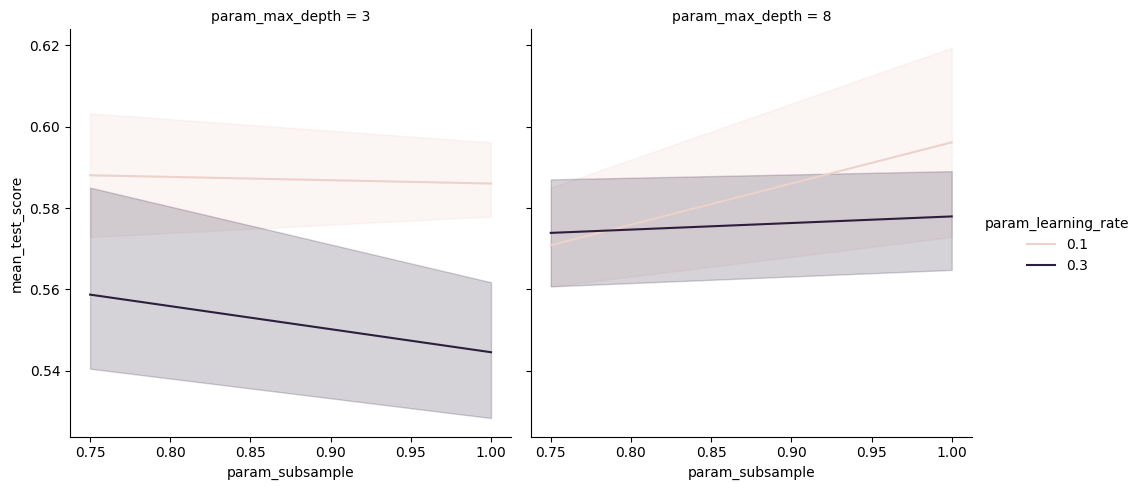

In [169]:
# https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/
import seaborn as sns 
sns.relplot(data=cv_results,
 kind='line',
 x='param_subsample',
 y='mean_test_score',
 hue='param_learning_rate',
 col='param_max_depth')
plt.show()

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

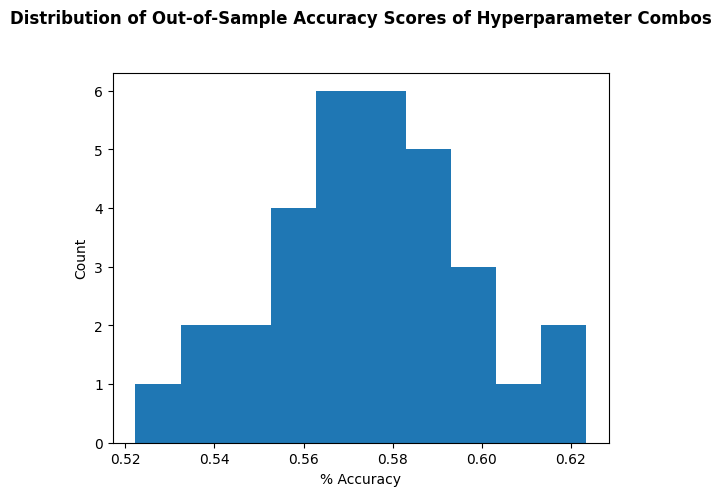

In [170]:
import matplotlib.pyplot as plt
plt.hist(cv_results['mean_test_score'])
plt.xlabel('% Accuracy')
plt.ylabel('Count')
 
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

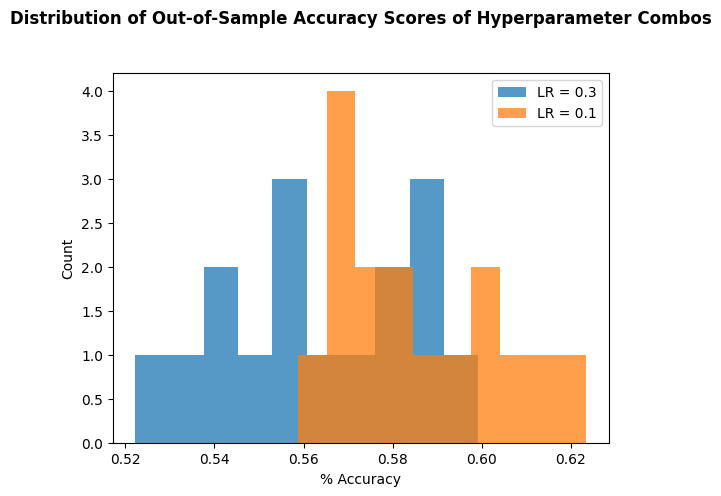

In [171]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_learning_rate == 0.3')
group2 = cv_results.query('param_learning_rate == 0.1')

plt.hist(group1['mean_test_score'], label='LR = 0.3', alpha=0.75)
plt.hist(group2['mean_test_score'], label='LR = 0.1', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

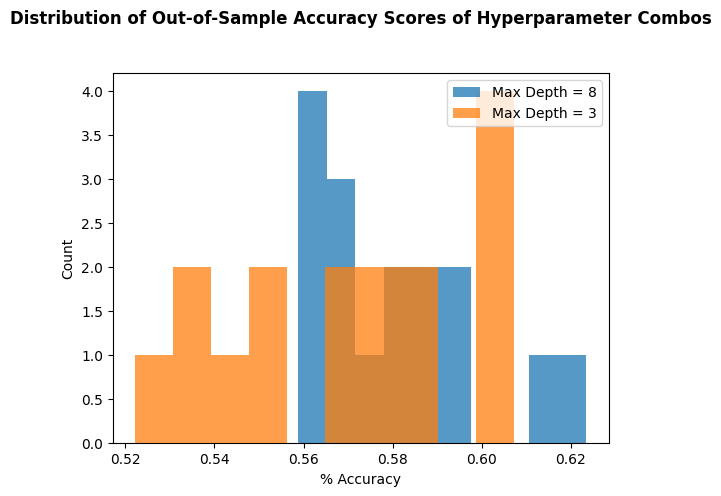

In [172]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_max_depth == 8')
group2 = cv_results.query('param_max_depth == 3')

plt.hist(group1['mean_test_score'], label='Max Depth = 8', alpha=0.75)
plt.hist(group2['mean_test_score'], label='Max Depth = 3', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

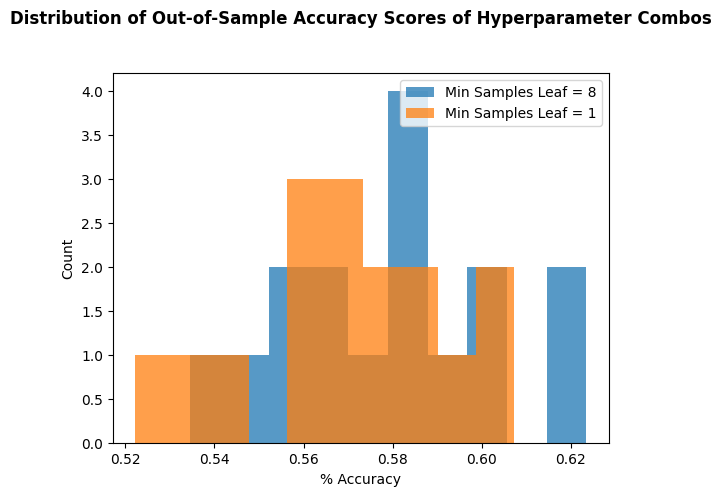

In [173]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_min_samples_leaf == 5')
group2 = cv_results.query('param_min_samples_leaf == 1')

plt.hist(group1['mean_test_score'], label='Min Samples Leaf = 8', alpha=0.75)
plt.hist(group2['mean_test_score'], label='Min Samples Leaf = 1', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

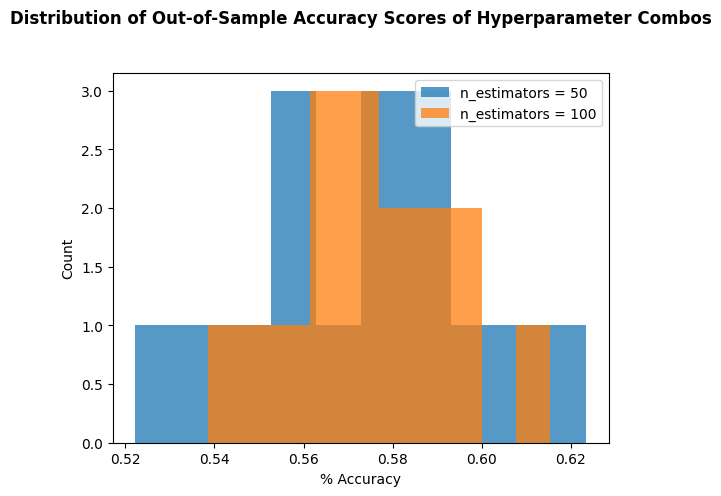

In [174]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_n_estimators == 50')
group2 = cv_results.query('param_n_estimators == 100')

plt.hist(group1['mean_test_score'], label='n_estimators = 50', alpha=0.75)
plt.hist(group2['mean_test_score'], label='n_estimators = 100', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

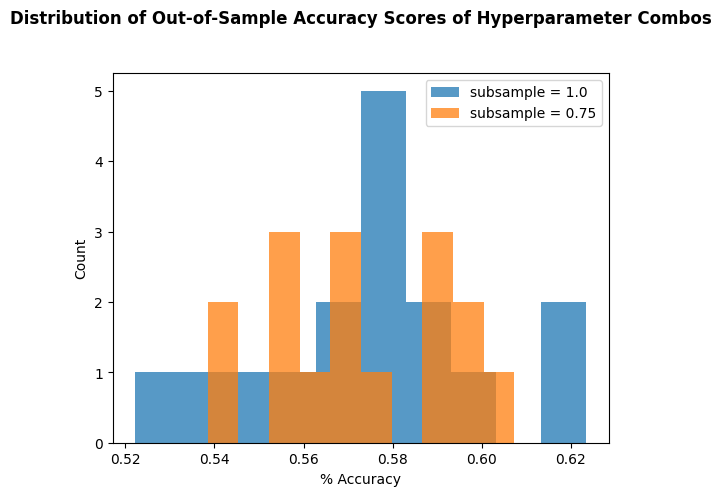

In [175]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_subsample == 1')
group2 = cv_results.query('param_subsample == .75')

plt.hist(group1['mean_test_score'], label='subsample = 1.0', alpha=0.75)
plt.hist(group2['mean_test_score'], label='subsample = 0.75', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")